<a href="https://colab.research.google.com/github/Claye1/Claye1/blob/main/Cluster_Analysis_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


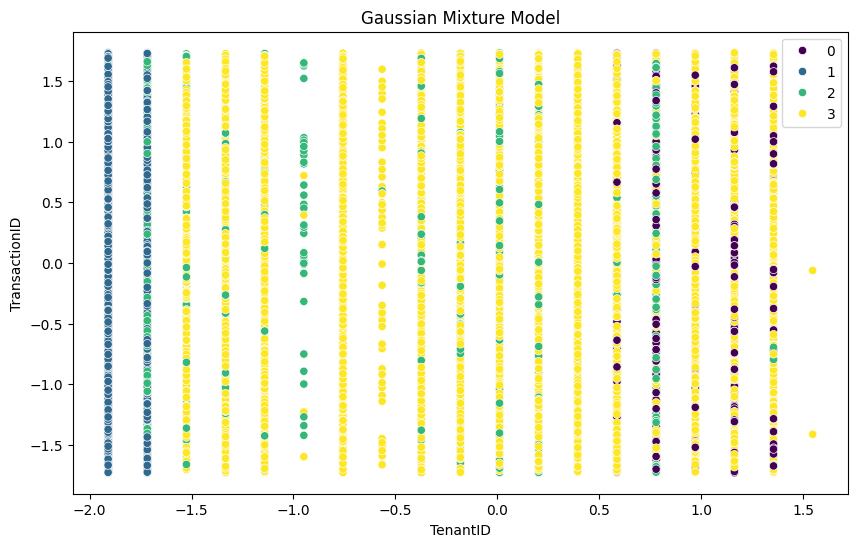

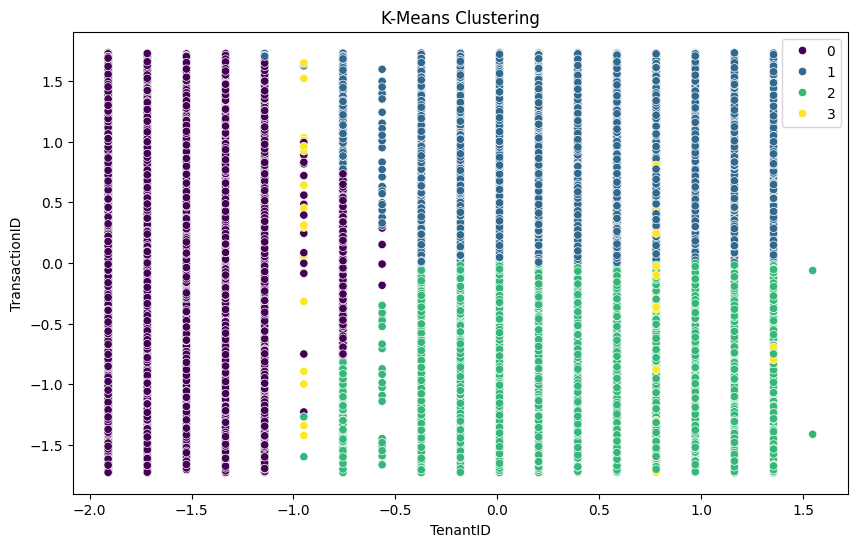

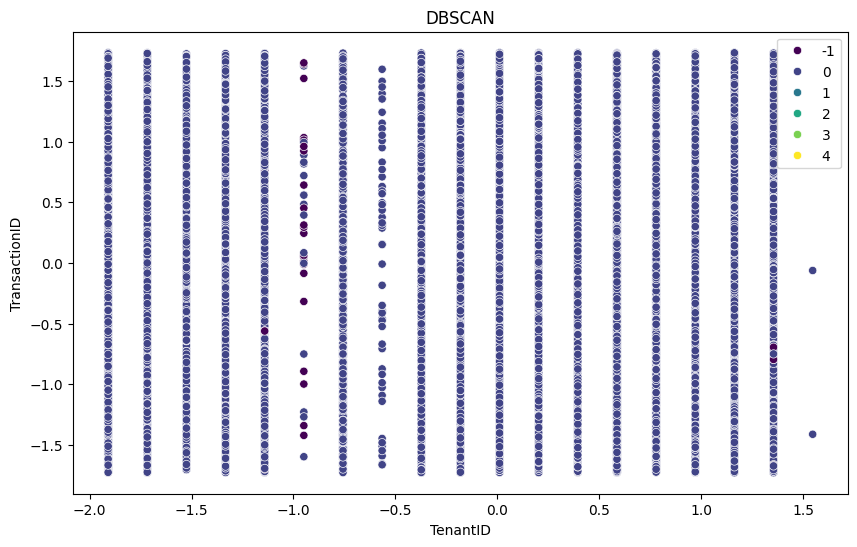

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/mnt/data/NEW all_transactions_and_accounts.csv'
data = pd.read_csv("/content/drive/MyDrive/NEW all_transactions_and_accounts.csv")

# Select relevant columns
data = data[['TenantID', 'TransactionID', 'UnitAmount']]

# Handle missing values
data = data.dropna()

# Encode TenantID and TransactionID
data['TenantID'] = data['TenantID'].astype('category').cat.codes
data['TransactionID'] = data['TransactionID'].astype('category').cat.codes

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

#1 Gaussian Mixture Model
gmm = GaussianMixture(n_components=4)
gmm_labels = gmm.fit_predict(scaled_data)

#2 K-Means Clustering
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(scaled_data)

#3 DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Function to plot clusters
def plot_clusters(data, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis')
    plt.title(title)
    plt.xlabel('TenantID')
    plt.ylabel('TransactionID')
    plt.legend()
    plt.show()

# Plotting the clusters
plot_clusters(scaled_data, gmm_labels, 'Gaussian Mixture Model')
plot_clusters(scaled_data, kmeans_labels, 'K-Means Clustering')
plot_clusters(scaled_data, dbscan_labels, 'DBSCAN')


### USING A SMALLER SAMPLE DATASET FOR HIERARCHICAL CLUSTERING

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


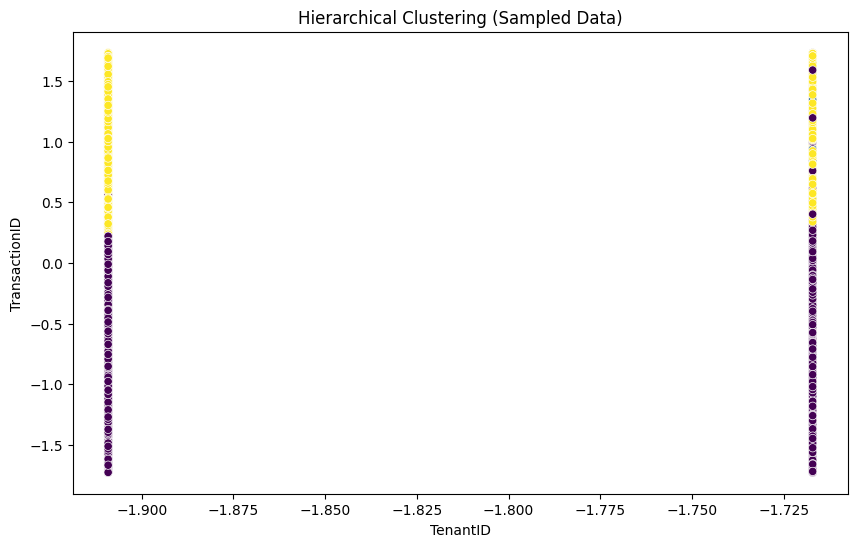

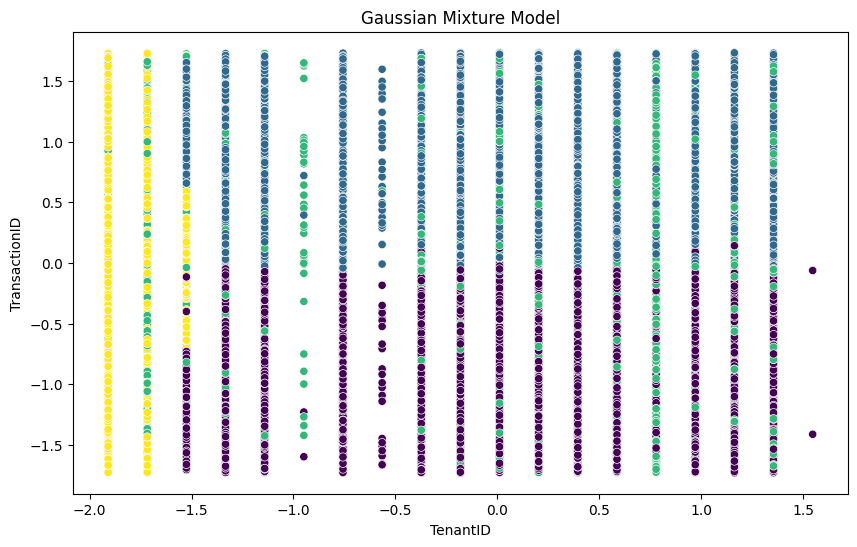

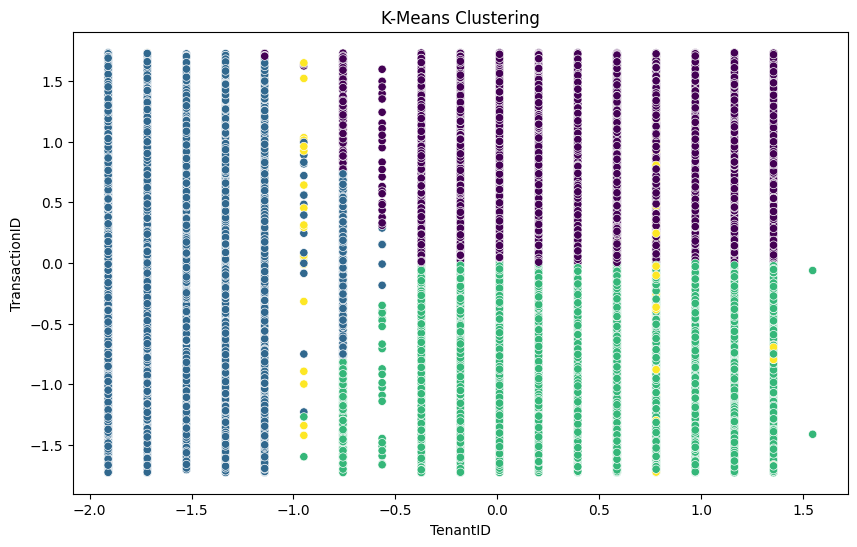

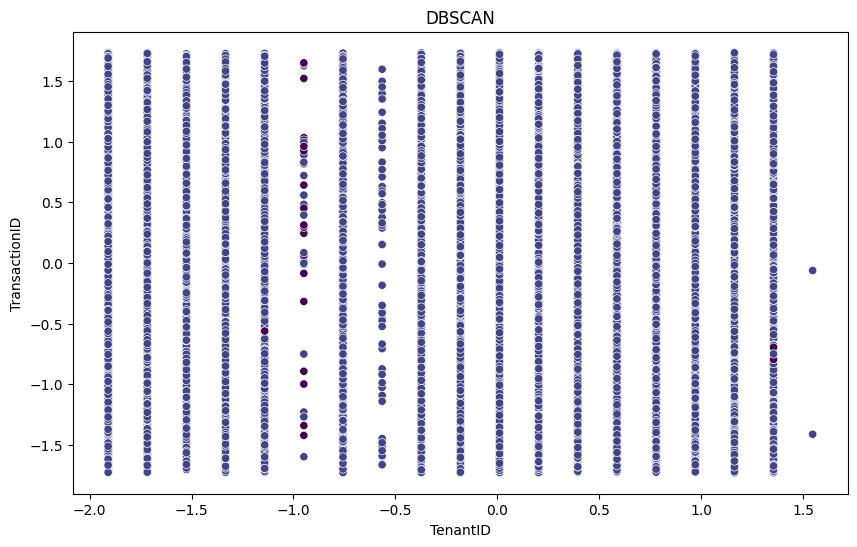

{'Hierarchical Clustering': array([0, 0, 0, ..., 0, 0, 0]),
 'Gaussian Mixture Model': array([3, 2, 3, ..., 2, 0, 0]),
 'K-Means Clustering': array([1, 1, 1, ..., 0, 2, 2], dtype=int32),
 'DBSCAN': array([0, 0, 0, ..., 0, 0, 0])}

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/mnt/data/NEW all_transactions_and_accounts.csv'
data = pd.read_csv("/content/drive/MyDrive/NEW all_transactions_and_accounts.csv")

# Select relevant columns
data = data[['TenantID', 'TransactionID', 'UnitAmount']]

# Handle missing values
data = data.dropna()

# Encode TenantID and TransactionID
data['TenantID'] = data['TenantID'].astype('category').cat.codes
data['TransactionID'] = data['TransactionID'].astype('category').cat.codes

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Use a smaller sample for hierarchical clustering
sampled_data = scaled_data[:10000]

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(sampled_data)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=4)
gmm_labels = gmm.fit_predict(scaled_data)

# K-Means Clustering
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(scaled_data)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Function to plot clusters
def plot_clusters(data, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis', legend=None)
    plt.title(title)
    plt.xlabel('TenantID')
    plt.ylabel('TransactionID')
    plt.show()

# Plotting the clusters
plot_clusters(sampled_data, hierarchical_labels, 'Hierarchical Clustering (Sampled Data)')
plot_clusters(scaled_data, gmm_labels, 'Gaussian Mixture Model')
plot_clusters(scaled_data, kmeans_labels, 'K-Means Clustering')
plot_clusters(scaled_data, dbscan_labels, 'DBSCAN')

# Output the cluster labels for inspection
{
    "Hierarchical Clustering": hierarchical_labels,
    "Gaussian Mixture Model": gmm_labels,
    "K-Means Clustering": kmeans_labels,
    "DBSCAN": dbscan_labels
}

### CLUSTERING ON ONLY 3 TECHNIQUES (GMM, DBSCAN & KMEANS)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


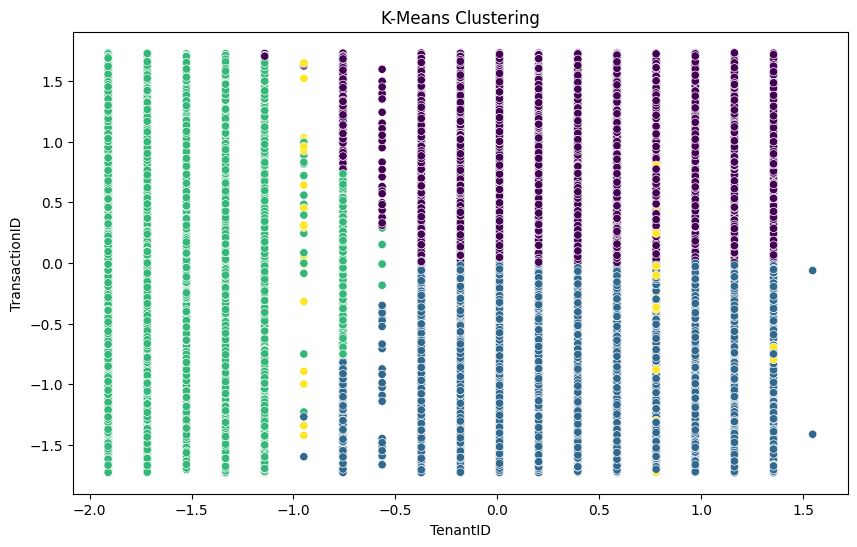

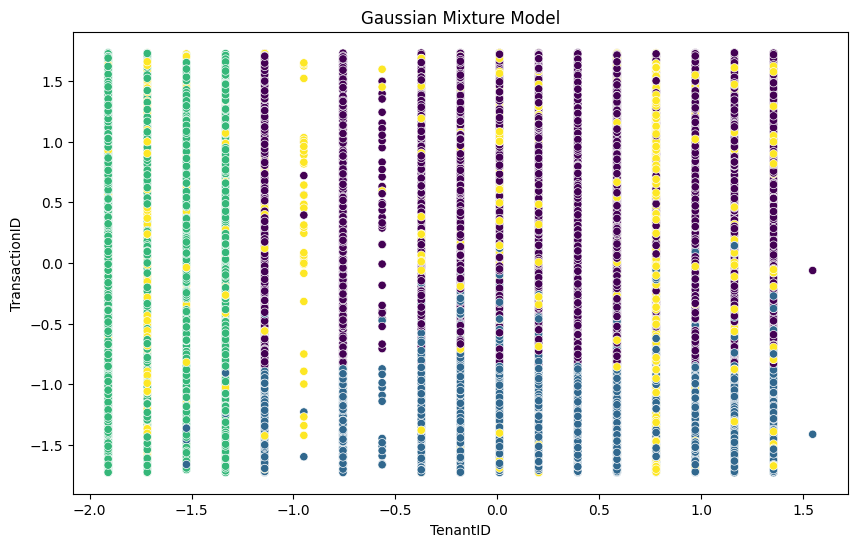

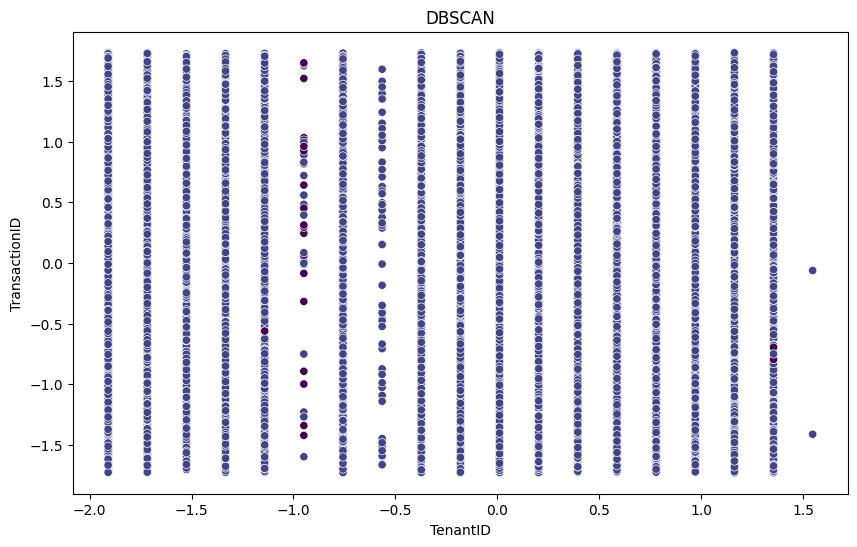

K-Means Clustering labels:
 [2 2 2 2 2 2 2 2 2 2]
Gaussian Mixture Model labels:
 [2 3 2 2 2 2 2 2 2 2]
DBSCAN labels:
 [0 0 0 0 0 0 0 0 0 0]


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/mnt/data/NEW all_transactions_and_accounts.csv'
data = pd.read_csv("/content/drive/MyDrive/NEW all_transactions_and_accounts.csv")

# Select relevant columns
data = data[['TenantID', 'TransactionID', 'UnitAmount']]

# Handle missing values
data = data.dropna()

# Encode TenantID and TransactionID
data['TenantID'] = data['TenantID'].astype('category').cat.codes
data['TransactionID'] = data['TransactionID'].astype('category').cat.codes

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Function to plot clusters
def plot_clusters(data, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis', legend=None)
    plt.title(title)
    plt.xlabel('TenantID')
    plt.ylabel('TransactionID')
    plt.show()

# Plotting the clusters
plot_clusters(scaled_data, kmeans_labels, 'K-Means Clustering')
plot_clusters(scaled_data, gmm_labels, 'Gaussian Mixture Model')
plot_clusters(scaled_data, dbscan_labels, 'DBSCAN')

# Outputting the cluster labels for inspection
cluster_labels = {
    "K-Means Clustering": kmeans_labels,
    "Gaussian Mixture Model": gmm_labels,
    "DBSCAN": dbscan_labels
}

# Display the first few entries of the cluster labels
for method, labels in cluster_labels.items():
    print(f"{method} labels:\n", labels[:10])


VISUALIZATION USING 2D

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


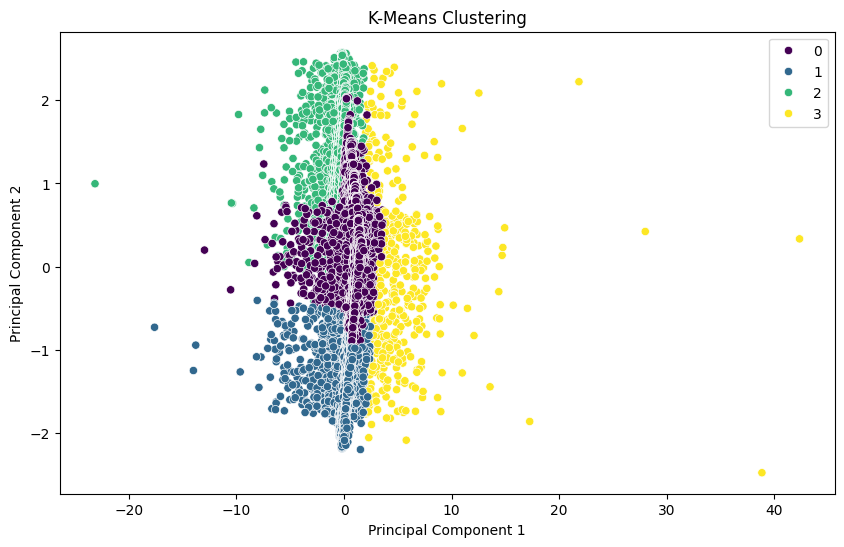

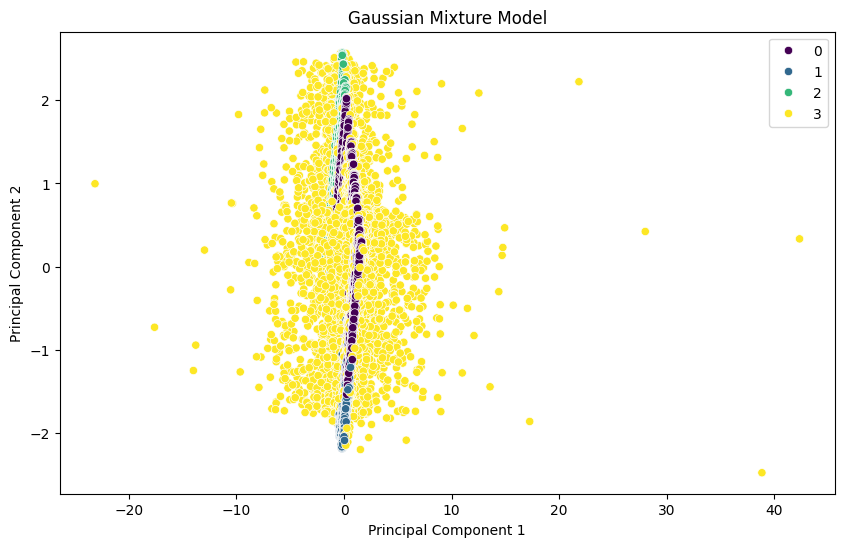

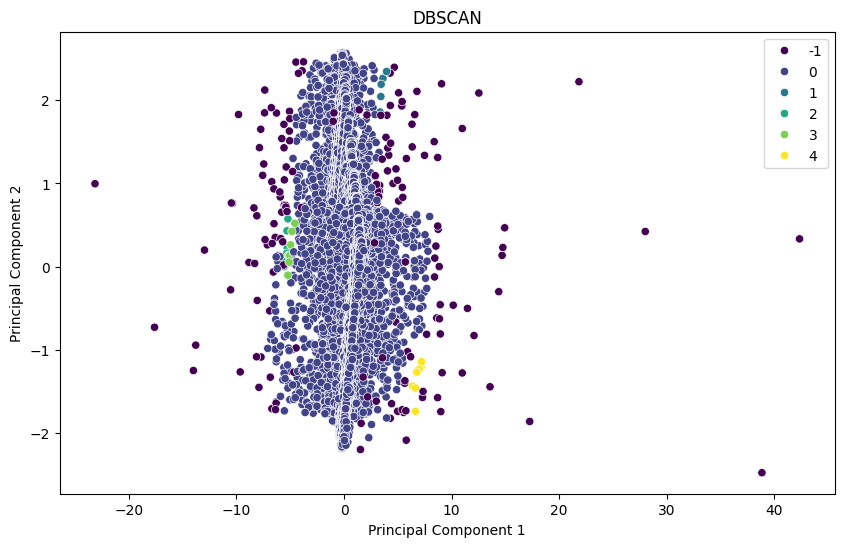

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/mnt/data/NEW all_transactions_and_accounts.csv'
data = pd.read_csv("/content/drive/MyDrive/NEW all_transactions_and_accounts.csv")

# Select relevant columns
data = data[['TenantID', 'TransactionID', 'UnitAmount']]

# Handle missing values
data = data.dropna()

# Encode TenantID and TransactionID
data['TenantID'] = data['TenantID'].astype('category').cat.codes
data['TransactionID'] = data['TransactionID'].astype('category').cat.codes

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Function to plot clusters
def plot_clusters(data, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis', legend='full')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Plotting the clusters
plot_clusters(pca_data, kmeans_labels, 'K-Means Clustering')
plot_clusters(pca_data, gmm_labels, 'Gaussian Mixture Model')
plot_clusters(pca_data, dbscan_labels, 'DBSCAN')

# Outputting the cluster labels for inspection
cluster_labels = {
    "K-Means Clustering": kmeans_labels,
    "Gaussian Mixture Model": gmm_labels,
    "DBSCAN": dbscan_labels
}

DEVELOPING A 3D VISUALIZATION

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


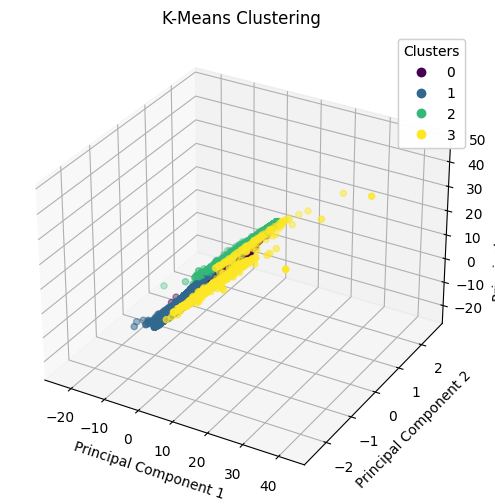

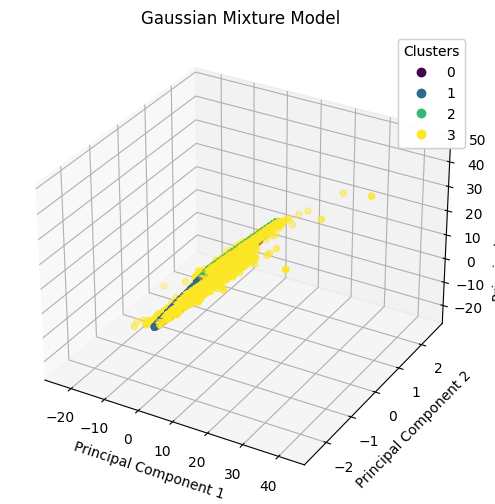

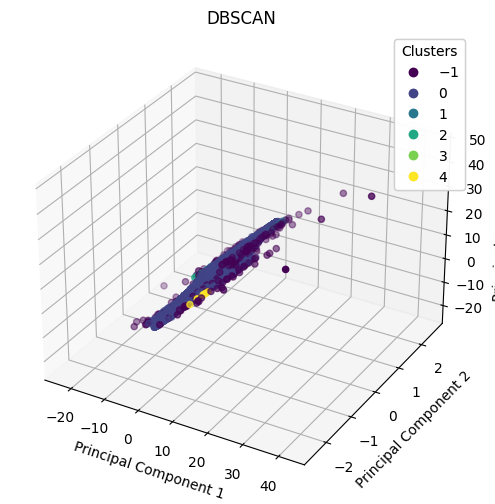

K-Means Clustering labels:
 [2 2 2 2 2 2 2 2 2 2]
Gaussian Mixture Model labels:
 [2 3 2 2 2 2 2 2 2 2]
DBSCAN labels:
 [0 0 0 0 0 0 0 0 0 0]


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Load the dataset
file_path = '/mnt/data/NEW all_transactions_and_accounts.csv'
data = pd.read_csv("/content/drive/MyDrive/NEW all_transactions_and_accounts.csv")

# Select relevant columns
data = data[['TenantID', 'TransactionID', 'UnitAmount']]

# Handle missing values
data = data.dropna()

# Encode TenantID and TransactionID
data['TenantID'] = data['TenantID'].astype('category').cat.codes
data['TransactionID'] = data['TransactionID'].astype('category').cat.codes

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Reduce dimensionality for 3D visualization
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Function to plot clusters in 3D
def plot_clusters_3d(data, labels, title):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis')
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    ax.set_title(title)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.show()

# Plotting the clusters
plot_clusters_3d(pca_data, kmeans_labels, 'K-Means Clustering')
plot_clusters_3d(pca_data, gmm_labels, 'Gaussian Mixture Model')
plot_clusters_3d(pca_data, dbscan_labels, 'DBSCAN')

# Outputting the cluster labels for inspection
cluster_labels = {
    "K-Means Clustering": kmeans_labels,
    "Gaussian Mixture Model": gmm_labels,
    "DBSCAN": dbscan_labels
}

# Display the first few entries of the cluster labels
for method, labels in cluster_labels.items():
    print(f"{method} labels:\n", labels[:10])


### K-MEANS & SILHOUTTE

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
file_path = '/mnt/data/NEW all_transactions_and_accounts.csv'
data = pd.read_csv("/content/drive/MyDrive/NEW all_transactions_and_accounts.csv")

# Inspect the dataset
print("Data Shape:", data.shape)
print("Data Head:\n", data.head())
print("Data Info:\n", data.info())
print("Data Description:\n", data.describe())


# Preprocessing the data
# Assuming that non-numeric columns need to be encoded or removed
# Drop non-numeric columns if necessary, otherwise encode them
data_numeric = data.select_dtypes(include=[float, int])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

#########
# Convert NumPy array to a Pandas DataFrame
data_scaled_df = pd.DataFrame(data_scaled)

# Identify rows with NaN values
nan_rows = data_scaled_df.isnull().any(axis=1)

# Remove rows with NaN values
data_scaled_no_nan_df = data_scaled_df[~nan_rows]

# Convert DataFrame back to a NumPy array
data_scaled_no_nan = data_scaled_no_nan_df.to_numpy()

# Ensure that sse is initialized as an empty list
sse = []


##################
# KMeans Loop
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_no_nan)  # <-------------
    sse.append(kmeans.inertia_)


##################
# Plot the SSE values
    # Append inertia value to the sse list
sse.append(kmeans.inertia_())

# Plot the SSE values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

# Show the plot
plt.show()

# Plot the SSE values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

# Show the plot
plt.show()

# Using the silhouette score to further validate the optimal number of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal Number of Clusters')
plt.show()

# Based on the above plots, choose the optimal number of clusters
optimal_clusters = 3  # Example choice based on the plots

# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original data
data['Cluster'] = cluster_labels

# Reduce dimensions for 3D visualization using PCA
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

# Create a DataFrame with PCA components and cluster labels
df_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca['Cluster'] = cluster_labels

# 3D Visualization of the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PCA1'], df_pca['PCA2'], df_pca['PCA3'], c=df_pca['Cluster'], cmap='viridis')

# Add labels
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D PCA Cluster Visualization')

# Add legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


Data Shape: (63592, 14)
Data Head:
                                TenantID            TenantName  \
0  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
1  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
2  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
3  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   
4  077a034a-8797-4f9e-8fb0-9ec3a4dffb5e  SUNBRIGHT BLINDS LTD   

                          TransactionID   Type                Name  \
0  128d08dc-63ff-4356-9a11-546106d5891c  SPEND            Vodafone   
1  1c27d774-e145-4f6b-9c28-a1b528fa5db0  SPEND  HM Revenue Customs   
2  770a6044-ec79-49f5-b16e-21da0536c101  SPEND            Vodafone   
3  19cdc3d0-a794-4d1e-a01c-6adb57be00ae  SPEND       Business Edge   
4  e13b2c74-5cfd-4454-9c31-b9d516f5c0ca  SPEND            Vodafone   

            DateString LineItemDescription  UnitAmount TaxType  LineAmount  \
0  2018-10-03T00:00:00                 NaN       14.06  INPUT2       14.06

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required by KMeans.

### CLUSTER ANALYSIS USING 5 DIFFERENT TECHNIQUES

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
file_path = 'path_to_your_file.csv'
data = pd.read_csv("/content/drive/MyDrive/NEW all_transactions_and_accounts.csv")

# Drop columns with a high percentage of missing values
columns_to_drop = [
    'Name', 'LineItemDescription', 'TaxType',
    'AccountID', 'Accounts_Description',
    'Accounts_ReportingCode', 'Accounts_ReportingCodeName'
]
data_cleaned = data.drop(columns=columns_to_drop)

# Handle missing values in relevant columns
data_cleaned = data_cleaned.dropna()

# Convert DateString to datetime format and extract features like month and day
data_cleaned['Date'] = pd.to_datetime(data_cleaned['DateString'])
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Day'] = data_cleaned['Date'].dt.day
data_cleaned = data_cleaned.drop(columns=['DateString', 'Date'])

# Encode categorical features
le_type = LabelEncoder()
data_cleaned['Type'] = le_type.fit_transform(data_cleaned['Type'])

# Select features for clustering
features = ['UnitAmount', 'LineAmount', 'Type', 'Month', 'Day']
X = data_cleaned[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Downsample the dataset to 10,000 samples for memory efficiency
data_sampled = data_cleaned.sample(n=10000, random_state=42)
X_sampled = data_sampled[features]
X_scaled_sampled = scaler.fit_transform(X_sampled)

# Apply K-Means Clustering on the downsampled dataset
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels_sampled = kmeans.fit_predict(X_scaled_sampled)

# Apply Agglomerative Clustering on the downsampled dataset
agg_clust = AgglomerativeClustering(n_clusters=5)
agg_labels_sampled = agg_clust.fit_predict(X_scaled_sampled)

# Apply DBSCAN on the downsampled dataset
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels_sampled = dbscan.fit_predict(X_scaled_sampled)

# Apply Gaussian Mixture Model on the downsampled dataset
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels_sampled = gmm.fit_predict(X_scaled_sampled)

# Apply Spectral Clustering on the downsampled dataset
spectral = SpectralClustering(n_clusters=5, assign_labels="discretize", random_state=42)
spectral_labels_sampled = spectral.fit_predict(X_scaled_sampled)

# Define a function to plot the 3D visualization
def plot_3d_clusters(X, labels, title):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', marker='o')
    ax.set_title(title)
    ax.set_xlabel('UnitAmount')
    ax.set_ylabel('LineAmount')
    ax.set_zlabel('Type')
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    plt.show()

# Plotting the 3D visualizations for each clustering technique on the downsampled dataset
plot_3d_clusters(X_scaled_sampled, kmeans_labels_sampled, "K-Means Clustering (Sampled)")
plot_3d_clusters(X_scaled_sampled, agg_labels_sampled, "Agglomerative Clustering (Sampled)")
plot_3d_clusters(X_scaled_sampled, dbscan_labels_sampled, "DBSCAN Clustering (Sampled)")
plot_3d_clusters(X_scaled_sampled, gmm_labels_sampled, "Gaussian Mixture Model Clustering (Sampled)")
plot_3d_clusters(X_scaled_sampled, spectral_labels_sampled, "Spectral Clustering (Sampled)")


### AGGREGATING DATASET BY "TENANT ID"

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
file_path = 'path_to_your_file.csv'
data = pd.read_csv("/content/drive/MyDrive/NEW all_transactions_and_accounts.csv")

# Drop columns with a high percentage of missing values
columns_to_drop = [
    'Name', 'LineItemDescription', 'TaxType',
    'AccountID', 'Accounts_Description',
    'Accounts_ReportingCode', 'Accounts_ReportingCodeName'
]
data_cleaned = data.drop(columns=columns_to_drop)

# Handle missing values in relevant columns
data_cleaned = data_cleaned.dropna()

# Convert DateString to datetime format and extract features like month and day
data_cleaned['Date'] = pd.to_datetime(data_cleaned['DateString'])
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Day'] = data_cleaned['Date'].dt.day
data_cleaned = data_cleaned.drop(columns=['DateString', 'Date'])

# Aggregate data by TenantID
tenant_aggregation = data_cleaned.groupby('TenantID').agg({
    'UnitAmount': ['sum', 'mean', 'std', 'count'],
    'LineAmount': ['sum', 'mean', 'std', 'count'],
    'Month': 'nunique',
    'Day': 'nunique'
}).reset_index()

# Flatten the MultiIndex columns
tenant_aggregation.columns = ['_'.join(col).strip() for col in tenant_aggregation.columns.values]
tenant_aggregation.rename(columns={'TenantID_': 'TenantID'}, inplace=True)

# Select features for clustering
features = tenant_aggregation.drop(columns=['TenantID']).fillna(0)
X = features.values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Apply Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clust.fit_predict(X_scaled)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=5, assign_labels="discretize", random_state=42)
spectral_labels = spectral.fit_predict(X_scaled)

# Define a function to plot the 3D visualization
def plot_3d_clusters(X, labels, title):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', marker='o')
    ax.set_title(title)
    ax.set_xlabel(features.columns[0])
    ax.set_ylabel(features.columns[1])
    ax.set_zlabel(features.columns[2])
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    plt.show()

# Plotting the 3D visualizations for each clustering technique
plot_3d_clusters(X_scaled, kmeans_labels, "K-Means Clustering")
plot_3d_clusters(X_scaled, agg_labels, "Agglomerative Clustering")
plot_3d_clusters(X_scaled, dbscan_labels, "DBSCAN Clustering")
plot_3d_clusters(X_scaled, gmm_labels, "Gaussian Mixture Model Clustering")
plot_3d_clusters(X_scaled, spectral_labels, "Spectral Clustering")


# Interactive 3D Scatter Plots (Rotated and Explored)

### 1. K MEANS

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
import plotly.express as px

# Load the dataset
file_path = 'path_to_your_file.csv'
data = pd.read_csv("/content/drive/MyDrive/NEW all_transactions_and_accounts.csv")

# Drop columns with a high percentage of missing values
columns_to_drop = [
    'Name', 'LineItemDescription', 'TaxType',
    'AccountID', 'Accounts_Description',
    'Accounts_ReportingCode', 'Accounts_ReportingCodeName'
]
data_cleaned = data.drop(columns=columns_to_drop)

# Handle missing values in relevant columns
data_cleaned = data_cleaned.dropna()

# Convert DateString to datetime format and extract features like month and day
data_cleaned['Date'] = pd.to_datetime(data_cleaned['DateString'])
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Day'] = data_cleaned['Date'].dt.day
data_cleaned = data_cleaned.drop(columns=['DateString', 'Date'])

# Encode categorical features
le_type = LabelEncoder()
data_cleaned['Type'] = le_type.fit_transform(data_cleaned['Type'])

# Select features for clustering
features = ['UnitAmount', 'LineAmount', 'Type', 'Month', 'Day']
X = data_cleaned[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Downsample the dataset to 10,000 samples for memory efficiency
data_sampled = data_cleaned.sample(n=10000, random_state=42)
X_sampled = data_sampled[features]
X_scaled_sampled = scaler.fit_transform(X_sampled)

# Apply K-Means Clustering on the downsampled dataset
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels_sampled = kmeans.fit_predict(X_scaled_sampled)


# Apply Spectral Clustering on the downsampled dataset
spectral = SpectralClustering(n_clusters=5, assign_labels="discretize", random_state=42)
spectral_labels_sampled = spectral.fit_predict(X_scaled_sampled)

# Define a function to plot the 3D visualization using Plotly
def plot_3d_clusters_plotly(X, labels, title):
    fig = px.scatter_3d(
        x=X[:, 0], y=X[:, 1], z=X[:, 2],
        color=labels,
        title=title,
        labels={'x': features[0], 'y': features[1], 'z': features[2]}
    )
    fig.show()

# Plotting the 3D visualizations for each clustering technique using Plotly
plot_3d_clusters_plotly(X_scaled_sampled, kmeans_labels_sampled, "K-Means Clustering")

# 2. HIERARCHICAL

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px

# Load the dataset
file_path = 'path_to_your_file.csv'
data = pd.read_csv("/content/drive/MyDrive/NEW all_transactions_and_accounts.csv")

# Drop columns with a high percentage of missing values
columns_to_drop = [
    'Name', 'LineItemDescription', 'TaxType',
    'AccountID', 'Accounts_Description',
    'Accounts_ReportingCode', 'Accounts_ReportingCodeName'
]
data_cleaned = data.drop(columns=columns_to_drop)

# Handle missing values in relevant columns
data_cleaned = data_cleaned.dropna()

# Convert DateString to datetime format and extract features like month and day
data_cleaned['Date'] = pd.to_datetime(data_cleaned['DateString'])
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Day'] = data_cleaned['Date'].dt.day
data_cleaned = data_cleaned.drop(columns=['DateString', 'Date'])

# Encode categorical features
le_type = LabelEncoder()
data_cleaned['Type'] = le_type.fit_transform(data_cleaned['Type'])

# Select features for clustering
features = ['UnitAmount', 'LineAmount', 'Type', 'Month', 'Day']
X = data_cleaned[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Downsample the dataset to 10,000 samples for memory efficiency
data_sampled = data_cleaned.sample(n=10000, random_state=42)
X_sampled = data_sampled[features]
X_scaled_sampled = scaler.fit_transform(X_sampled)

# Apply Agglomerative Clustering on the downsampled dataset
agg_clust = AgglomerativeClustering(n_clusters=5)
agg_labels_sampled = agg_clust.fit_predict(X_scaled_sampled)

# Define a function to plot the 3D visualization using Plotly
def plot_3d_clusters_plotly(X, labels, title):
    fig = px.scatter_3d(
        x=X[:, 0], y=X[:, 1], z=X[:, 2],
        color=labels,
        title=title,
        labels={'x': features[0], 'y': features[1], 'z': features[2]}
    )
    fig.show()

# Plotting the 3D visualizations for each clustering technique using Plotly
plot_3d_clusters_plotly(X_scaled_sampled, agg_labels_sampled, "Agglomerative Clustering")


# 3. DBSCAN

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
import plotly.express as px

# Load the dataset
file_path = 'path_to_your_file.csv'
data = pd.read_csv("/content/drive/MyDrive/NEW all_transactions_and_accounts.csv")

# Drop columns with a high percentage of missing values
columns_to_drop = [
    'Name', 'LineItemDescription', 'TaxType',
    'AccountID', 'Accounts_Description',
    'Accounts_ReportingCode', 'Accounts_ReportingCodeName'
]
data_cleaned = data.drop(columns=columns_to_drop)

# Handle missing values in relevant columns
data_cleaned = data_cleaned.dropna()

# Convert DateString to datetime format and extract features like month and day
data_cleaned['Date'] = pd.to_datetime(data_cleaned['DateString'])
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Day'] = data_cleaned['Date'].dt.day
data_cleaned = data_cleaned.drop(columns=['DateString', 'Date'])

# Encode categorical features
le_type = LabelEncoder()
data_cleaned['Type'] = le_type.fit_transform(data_cleaned['Type'])

# Select features for clustering
features = ['UnitAmount', 'LineAmount', 'Type', 'Month', 'Day']
X = data_cleaned[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Downsample the dataset to 10,000 samples for memory efficiency
data_sampled = data_cleaned.sample(n=10000, random_state=42)
X_sampled = data_sampled[features]
X_scaled_sampled = scaler.fit_transform(X_sampled)

# Apply DBSCAN on the downsampled dataset
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels_sampled = dbscan.fit_predict(X_scaled_sampled)

# 3D visualization using Plotly
def plot_3d_clusters_plotly(X, labels, title):
    fig = px.scatter_3d(
        x=X[:, 0], y=X[:, 1], z=X[:, 2],
        color=labels,
        title=title,
        labels={'x': features[0], 'y': features[1], 'z': features[2]}
    )
    fig.show()

# Plotting the 3D visualizations for each clustering technique using Plotly
plot_3d_clusters_plotly(X_scaled_sampled, dbscan_labels_sampled, "DBSCAN Clustering")



# 4. GMM and SPECTRAL



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
import plotly.express as px

# Load the dataset
file_path = 'path_to_your_file.csv'
data = pd.read_csv("/content/drive/MyDrive/NEW all_transactions_and_accounts.csv")

# Drop columns with a high percentage of missing values
columns_to_drop = [
    'Name', 'LineItemDescription', 'TaxType',
    'AccountID', 'Accounts_Description',
    'Accounts_ReportingCode', 'Accounts_ReportingCodeName'
]
data_cleaned = data.drop(columns=columns_to_drop)

# Handle missing values in relevant columns
data_cleaned = data_cleaned.dropna()

# Convert DateString to datetime format and extract features like month and day
data_cleaned['Date'] = pd.to_datetime(data_cleaned['DateString'])
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Day'] = data_cleaned['Date'].dt.day
data_cleaned = data_cleaned.drop(columns=['DateString', 'Date'])

# Encode categorical features
le_type = LabelEncoder()
data_cleaned['Type'] = le_type.fit_transform(data_cleaned['Type'])

# Select features for clustering
features = ['UnitAmount', 'LineAmount', 'Type', 'Month', 'Day']
X = data_cleaned[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Downsample the dataset to 10,000 samples for memory efficiency
data_sampled = data_cleaned.sample(n=10000, random_state=42)
X_sampled = data_sampled[features]
X_scaled_sampled = scaler.fit_transform(X_sampled)

# Apply Gaussian Mixture Model on the downsampled dataset
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels_sampled = gmm.fit_predict(X_scaled_sampled)

# Apply Spectral Clustering on the downsampled dataset
spectral = SpectralClustering(n_clusters=5, assign_labels="discretize", random_state=42)
spectral_labels_sampled = spectral.fit_predict(X_scaled_sampled)

# Define a function to plot the 3D visualization using Plotly
def plot_3d_clusters_plotly(X, labels, title):
    fig = px.scatter_3d(
        x=X[:, 0], y=X[:, 1], z=X[:, 2],
        color=labels,
        title=title,
        labels={'x': features[0], 'y': features[1], 'z': features[2]}
    )
    fig.show()

# Plotting the 3D visualizations for each clustering technique using Plotly
plot_3d_clusters_plotly(X_scaled_sampled, gmm_labels_sampled, "Gaussian Mixture Model Clustering")
plot_3d_clusters_plotly(X_scaled_sampled, spectral_labels_sampled, "Spectral Clustering")


# ONE HOT ENCODING / TF - IDF:

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
import plotly.express as px

# Load the dataset
file_path = 'path_to_your_file.csv'
data = pd.read_csv("/content/drive/MyDrive/NEW all_transactions_and_accounts.csv")

# Handle missing values in the entire DataFrame
# (this is different from your original code)
data_cleaned = data.fillna({'Name': 'LineItemDescription', 'TaxType':'Unknown', 'AccountID': 0, 'Accounts_Description': 'Unknown', 'Accounts_ReportingCode': 'Unknown', 'Accounts_ReportingCodeName': 'Unknown'})

# Convert DateString to datetime format and extract features like month and day
data_cleaned['DateString'] = pd.to_datetime(data_cleaned['DateString'])
data_cleaned['Month'] = data_cleaned['DateString'].dt.month
data_cleaned['DateString'] = pd.to_datetime(data_cleaned['DateString'])
data_cleaned['Month'] = data_cleaned['DateString'].dt.month
data_cleaned['Day'] = data_cleaned['DateString'].dt.day
data_cleaned = data_cleaned.drop(columns=['DateString'])

# Encode categorical features
le_tax_type = LabelEncoder()
data_cleaned['TaxType'] = le_tax_type.fit_transform(data_cleaned['TaxType'])

le_tenant_id = LabelEncoder()
data_cleaned['TenantID'] = le_tenant_id.fit_transform(data_cleaned['TenantID'])

le_transaction_id = LabelEncoder()
data_cleaned['TransactionID'] = le_transaction_id.fit_transform(data_cleaned['TransactionID'])

# Fill missing values in 'LineItemDescription' with an empty string before applying TF-IDF
data_cleaned['LineItemDescription'] = data_cleaned['LineItemDescription'].fillna('')

# Convert text features using TF-IDF Vectorizer
vectorizer_name = TfidfVectorizer(max_features=100)
name_tfidf = vectorizer_name.fit_transform(data_cleaned['Name']).toarray()

vectorizer_desc = TfidfVectorizer(max_features=100)
desc_tfidf = vectorizer_desc.fit_transform(data_cleaned['LineItemDescription']).toarray() # Now this should work without error

# Combine all features
features = pd.concat([
    data_cleaned[['TaxType', 'TenantID', 'TransactionID', 'Month', 'Day']],
    pd.DataFrame(name_tfidf, columns=[f'Name_{i}' for i in range(name_tfidf.shape[1])]),
    pd.DataFrame(desc_tfidf, columns=[f'LineItemDescription_{i}' for i in range(desc_tfidf.shape[1])])
], axis=1)

X = features.values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Downsample the dataset to 10,000 samples for memory efficiency
data_sampled = data_cleaned.sample(n=10000, random_state=42)
X_sampled = features.loc[data_sampled.index].values
X_scaled_sampled = scaler.fit_transform(X_sampled)

# Check if there are still any NaNs in the downsampled data
print("Number of NaNs in X_scaled_sampled:", pd.isna(X_scaled_sampled).sum())

# Apply K-Means Clustering on the downsampled dataset
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels_sampled = kmeans.fit_predict(X_scaled_sampled)

# Apply Agglomerative Clustering on the downsampled dataset
agg_clust = AgglomerativeClustering(n_clusters=5)
agg_labels_sampled = agg_clust.fit_predict(X_scaled_sampled)

# Apply DBSCAN on the downsampled dataset
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels_sampled = dbscan.fit_predict(X_scaled_sampled)

# Apply Gaussian Mixture Model on the downsampled dataset
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels_sampled = gmm.fit_predict(X_scaled_sampled)

# Apply Spectral Clustering on the downsampled dataset
spectral = SpectralClustering(n_clusters=5, assign_labels="discretize", random_state=42)
spectral_labels_sampled = spectral.fit_predict(X_scaled_sampled)

# Define a function to plot the 3D visualization using Plotly
def plot_3d_clusters_plotly(X, labels, title):
    fig = px.scatter_3d(
        x=X[:, 0], y=X[:, 1], z=X[:, 2],
        color=labels,
        title=title,
        labels={'x': features.columns[0], 'y': features.columns[1], 'z': features.columns[2]}
    )
    fig.show()

# Plotting the 3D visualizations for each clustering technique using Plotly
plot_3d_clusters_plotly(X_scaled_sampled, kmeans_labels_sampled, "K-Means Clustering")
plot_3d_clusters_plotly(X_scaled_sampled, agg_labels_sampled, "Agglomerative Clustering")
plot_3d_clusters_plotly(X_scaled_sampled, dbscan_labels_sampled, "DBSCAN Clustering")
plot_3d_clusters_plotly(X_scaled_sampled, gmm_labels_sampled, "Gaussian Mixture Model Clustering")
plot_3d_clusters_plotly(X_scaled_sampled, spectral_labels_sampled, "Spectral Clustering")


Number of NaNs in X_scaled_sampled: 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


# DATA SPLITTING

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/mnt/data/NEW all_transactions_and_accounts.csv'
data = pd.read_csv("/content/drive/MyDrive/NEW all_transactions_and_accounts.csv")

# Display the first few rows to understand the structure
data.head()


,TenantID,TenantName,TransactionID,Type,Name,DateString,LineItemDescription,UnitAmount,TaxType,LineAmount,AccountID,Accounts_Description,Accounts_ReportingCode,Accounts_ReportingCodeName
0,077a034a-8797-4f9e-8fb0-9ec3a4dffb5e,SUNBRIGHT BLINDS LTD,128d08dc-63ff-4356-9a11-546106d5891c,SPEND,Vodafone,2018-10-03T00:00:00,NaN,14.06,INPUT2,14.06,NaN,NaN,NaN,NaN
1,077a034a-8797-4f9e-8fb0-9ec3a4dffb5e,SUNBRIGHT BLINDS LTD,1c27d774-e145-4f6b-9c28-a1b528fa5db0,SPEND,HM Revenue Customs,2018-11-02T00:00:00,NaN,9994.50,NONE,9994.50,NaN,NaN,NaN,NaN
2,077a034a-8797-4f9e-8fb0-9ec3a4dffb5e,SUNBRIGHT BLINDS LTD,770a6044-ec79-49f5-b16e-21da0536c101,SPEND,Vodafone,2018-11-02T00:00:00,NaN,28.90,INPUT2,28.90,NaN,NaN,NaN,NaN
3,077a034a-8797-4f9e-8fb0-9ec3a4dffb5e,SUNBRIGHT BLINDS LTD,19cdc3d0-a794-4d1e-a01c-6adb57be00ae,SPEND,Business Edge,2018-11-15T00:00:00,NaN,150.00,INPUT2,150.00,NaN,NaN,NaN,NaN
4,077a034a-8797-4f9e-8fb0-9ec3a4dffb5e,SUNBRIGHT BLINDS LTD,e13b2c74-5cfd-4454-9c31-b9d516f5c0ca,SPEND,Vodafone,2018-12-05T00:00:00,NaN,27.19,INPUT2,27.19,NaN,NaN,NaN,NaN


In [ ]:
# Group the data by 'TenantName'
grouped_data = data.groupby('TenantName')


In [ ]:
# Create a dictionary to store the subsets
tenant_name_dict = {}

# Iterate over each group and save the subset DataFrame to the dictionary
for tenant_name, subset in grouped_data:
    tenant_name_dict[tenant_name] = subset

# Display the keys (TenantIDs) in the dictionary
print(tenant_name_dict.keys())


dict_keys(['COACH TRAVEL SOLUTIONS LTD', 'FIFTH FLOOR LIMITED', 'QUICKEN MOTORS LTD', 'SMITH AND JAKES LIMITED', 'SUNBRIGHT BLINDS LTD', 'SW LIVING LTD', 'Smile Associates Ltd', 'TAILORS OF DEANSGATE LTD', 'TEAM CONTINUITY SOLUTIONS LTD', 'TECNICA AUTOMOTIVE LTD', 'THE BRUNSWICK (NW) LTD', 'THE LITTLE ORANGE VAN LTD', 'THE MACHINE SHOP MANCHESTER LTD', 'Tailor Made Mats Ltd', 'VITA BEAUTY SALON LTD', 'WARRINGTON FENCING LTD', 'WAY OUT FAR LIMITED', 'WEB 3 RESOURCE LTD', 'WIZARD SPORTS AND CLASSICS LIMITED'])


In [ ]:
# Access data for a specific TenantName, for example TenantName = 1
tenant_name = 1
if tenant_name in tenant_name_dict:
    tenant_name = tenant_name_dict[tenant_name]
    print(tenant_name.head())
else:
    print(f"No data found for TenantName {tenant_name}")


No data found for TenantName 1


In [ ]:
import os

# Create a directory to save the tenant data files
output_dir = '/mnt/data/tenant_data/'
os.makedirs(output_dir, exist_ok=True)

# Save each tenant's data to a separate CSV file
for tenant_name, subset in tenant_name_dict.items():
    output_file = os.path.join(output_dir, f'tenant_{tenant_name}.csv')
    subset.to_csv(output_file, index=False)


In [ ]:
import pandas as pd
import os

# Define the path to your CSV file
file_path = '/mnt/data/NEW all_transactions_and_accounts.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv("/content/drive/MyDrive/NEW all_transactions_and_accounts.csv")
print("Data loaded successfully.")
print(data.head())

# Check if 'TenantName' column exists
if 'TenantName' not in data.columns:
    raise ValueError("The column 'TenantName' does not exist in the dataset.")

# Group the data by 'TenantName'
grouped_data = data.groupby('TenantName')

# Create a dictionary to store the subsets
tenant_data_dict = {}
for tenant_name, subset in grouped_data:
    tenant_data_dict[tenant_name] = subset

# Display the keys (TenantNames) in the dictionary
print("Tenant names in the dataset:", tenant_data_dict.keys())

# Access and print data for a specific TenantName
tenant_name = 'example_tenant_name'  # Replace with an actual tenant name from your data
if tenant_name in tenant_data_dict:
    tenant_data = tenant_data_dict[tenant_name]
    print(f"Data for TenantName '{tenant_name}':")
    print(tenant_data.head())
else:
    print(f"No data found for TenantName '{tenant_name}'")

# Define the directory where you want to save the tenant data files
output_dir = '/mnt/data/tenant_data/'
os.makedirs(output_dir, exist_ok=True)

# Save each tenant's data to a separate CSV file
for tenant_name, subset in tenant_data_dict.items():
    # Replace spaces with underscores and lowercase the tenant name for the filename
    sanitized_tenant_name = tenant_name.replace(" ", "_").lower()
    output_file = os.path.join(output_dir, f'tenant_{sanitized_tenant_name}.csv')
    subset.to_csv(output_file, index=False)
    print(f"Saved TenantName '{tenant_name}' data to {output_file}")

